# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np 
import re
import os
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from datetime import datetime, timedelta

# Visualization Style

In [2]:
formatter = ticker.StrMethodFormatter('Rp.{x:,.0f}')

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Data Collecting

- Import system path

In [3]:
import sys
sys.path.append('..')

- Import module

In [4]:
from scripts import get_data_from_mongo

- Get Data from MongoDB

In [5]:
df_import = get_data_from_mongo.get_data_mongo('tanah_bali_raw')
df_import = pd.DataFrame(df_import)

----------------------------------------------
Connected to db db_tanah_bali
Total documents get: 26838
Dissconnected!


In [6]:
df = df_import.copy()
df.head()

,_id,title,date,price,address,land_area,timestamp
0,6649e16d9c170999ee69ca70,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
1,6649e16d9c170999ee69ca78,Beautiful Land,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21
2,6649e16d9c170999ee69ca7b,TANAH ZONA KUNING JALAN LEBAR LINGKUNGAN VILLA...,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21
3,6649e16d9c170999ee69ca7e,Tanah Jual Lokasi Kuta,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21
4,6649e16d9c170999ee69ca81,YOP YOI DI JUAL TANAH LOKASI KELATING KERAMBIT...,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21


# Data Understanding

### Check Dataframe Dimension

In [7]:
df.shape

(26838, 7)

In [8]:
df.columns

Index(['_id', 'title', 'date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26838 entries, 0 to 26837
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        26838 non-null  object
 1   title      26838 non-null  object
 2   date       26838 non-null  object
 3   price      26838 non-null  object
 4   address    26838 non-null  object
 5   land_area  26838 non-null  object
 6   timestamp  26838 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


# Data Preprocessing

### Handling Missing Value

In [10]:
df.isna().sum().to_frame().T

,_id,title,date,price,address,land_area,timestamp
0,0,0,0,0,0,0,0


### Handling Duplicate Data

- Drop _id Column

In [11]:
df = df.drop(columns='_id', axis=1)
df.head()

,title,date,price,address,land_area,timestamp
0,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
1,Beautiful Land,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21
2,TANAH ZONA KUNING JALAN LEBAR LINGKUNGAN VILLA...,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21
3,Tanah Jual Lokasi Kuta,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21
4,YOP YOI DI JUAL TANAH LOKASI KELATING KERAMBIT...,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21


- Check Duplicate Data

In [12]:
dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 321
Dari total 26838 data


In [13]:
df[df.duplicated()]

,title,date,price,address,land_area,timestamp
129,LAST 8 UNITS !! Ultimate Cliff Front Land & Fo...,Diperbarui 1 hari yang lalu oleh,"Rp 3,5 Juta /m²","Seraya, Karangasem",700 m²,2024-05-19 16:27:19
528,"LAHAN BUC DENGAN VIEW MENAWAN DI TEGALLALANG, ...",Diperbarui 1 hari yang lalu oleh,"Rp 7,75 Miliar Total","Tegallalang, Gianyar",3100 m²,2024-05-19 16:27:04
544,TANAH BONUS BANGUNAN DI JL UTAMA DEWI MADRI CO...,Diperbarui 7 jam yang lalu oleh,Rp 9 Miliar Total,"Denpasar Selatan, Denpasar",577 m²,2024-05-19 16:25:51
650,TANAH MURAH COCOK BUAT BANGUN RUMAH VILLA,Diperbarui 1 hari yang lalu oleh,Rp 405 Juta Total,"Sukawati, Gianyar",141 m²,2024-05-19 16:27:02
753,Tanah Kavling Murah daerah Banyuning Singaraja,Diperbarui 2 hari yang lalu oleh,Rp 250 Juta Total,"Banyuning, Buleleng",125 m²,2024-05-19 16:28:12
...,...,...,...,...,...,...
23379,"Tanah 3,45 Are Area Seminyak, Bali",Diperbarui 3 bulan yang lalu oleh,"Rp 3,1 Miliar Total","Seminyak, Badung",345 m²,2024-05-19 18:59:22
23857,"Kavling Ocean View Cocok Untuk Vila di Pecatu,...",Diperbarui 3 bulan yang lalu oleh,"Rp 61,6 Miliar Total","Pecatu, Badung",15500 m²,2024-05-19 19:02:18
24558,"For Sale Land 4,55 Are At Suluban, Pecatu, Bali",Diperbarui 2 bulan yang lalu oleh,Rp 6 Juta /m²,"Pecatu, Badung",455 m²,2024-05-19 19:07:33
24585,Tanah 20 Are Unblocked View di Temu Dewi Pecat...,Diperbarui 2 bulan yang lalu oleh,"Rp 4,5 Juta /m²","Pecatu, Badung",2000 m²,2024-05-19 19:07:40


- Remove Duplicate Data

In [14]:
df.drop_duplicates(keep='first', inplace=True)

dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 0
Dari total 26517 data


- Remove Unnessecary Data

In [15]:
df = df.drop(columns='title', axis=1)
df.columns

Index(['date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Cleaning Date Column

- Check Date Column

In [17]:
df['date'].head().to_frame()

,date
0,Diperbarui 1 jam yang lalu oleh
1,Diperbarui 2 bulan yang lalu oleh
2,Diperbarui 3 minggu yang lalu oleh
3,Diperbarui 3 jam yang lalu oleh
4,Diperbarui 3 jam yang lalu oleh


- Convert String to Datetime Data Type

In [18]:
import locale
locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')

def convert_relative_data(description, timestamp):
    match = re.search(r'(\d+) (menit|jam|hari|minggu|bulan)', description)
    if not match:
        return None
    
    value = int(match.group(1))
    unit = match.group(2)
    
    if unit == 'menit':
        delta = timedelta(minutes=value)
    elif unit == 'jam':
        delta = timedelta(hours=value)
    elif unit == 'hari':
        delta = timedelta(days=value)
    elif unit == 'minggu':
        delta = timedelta(weeks=value)
    elif unit == 'bulan':
        delta = timedelta(days=30 * value)
    else:
        delta = timedelta()
    
    date = timestamp - delta
    return date

def convert_absolute_date(text):
    date_pattern = r'\b\d{2}\s\w+\s\d{4}\b'
    match = re.search(date_pattern, text)
    if match:
        return datetime.strptime(match.group(0), '%d %B %Y')
    return None

def convert_to_timestamp(row):
    description = row['date']
    timestamp = row['timestamp']
    
    if 'yang lalu' in description:
        return convert_relative_data(description, timestamp)
    else:
        return convert_absolute_date(description)

In [19]:
df['converted_date'] = df.apply(convert_to_timestamp, axis=1).dt.strftime('%Y-%m-%d')

df_cleaned_date = df.copy()
df_cleaned_date.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21,2024-03-20
2,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21,2024-04-28
3,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21,2024-05-19
4,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21,2024-05-19


In [20]:
df_cleaned_date.sort_values(by='converted_date', ascending=True)

,date,price,address,land_area,timestamp,converted_date
23773,Diperbarui 11 Desember 2022 oleh,Rp 7 Juta /m²,"Sanur Kauh, Denpasar",500 m²,2024-05-19 19:02:09,2022-12-11
23730,Diperbarui 15 Desember 2022 oleh,"Rp 5,5 Miliar Total","Kediri, Tabanan",2200 m²,2024-05-19 19:01:45,2022-12-15
23728,Diperbarui 16 Desember 2022 oleh,"Rp 8,12 Miliar Total","Canggu, Badung",956 m²,2024-05-19 19:01:45,2022-12-16
23697,Diperbarui 22 Desember 2022 oleh,Rp 11 Juta /m²,"Kediri, Tabanan",105 m²,2024-05-19 19:01:28,2022-12-22
23629,Diperbarui 27 Desember 2022 oleh,"Rp 3,25 Juta /m²","Candi Dasa, Karangasem",2510 m²,2024-05-19 19:01:21,2022-12-27
...,...,...,...,...,...,...
620,Diperbarui 11 jam yang lalu oleh,"Rp 4,5 Miliar Total","Kerambitan, Tabanan",1500 m²,2024-05-19 16:26:14,2024-05-19
618,Diperbarui 11 jam yang lalu oleh,"Rp 29,9 Miliar Total","Ubud, Gianyar",16649 m²,2024-05-19 16:26:14,2024-05-19
13694,Diperbarui 3 jam yang lalu oleh,Rp 6 Juta /m²,"Cemagi, Badung",170 m²,2024-05-19 17:55:17,2024-05-19
613,Diperbarui 10 jam yang lalu oleh,"Rp 2,27 Miliar Total","Kerambitan, Tabanan",700 m²,2024-05-19 16:26:06,2024-05-19


- Backup Dataframe

In [21]:
df = df_cleaned_date.copy()
df.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21,2024-03-20
2,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21,2024-04-28
3,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21,2024-05-19
4,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21,2024-05-19


- Detele Converted_Date and Timestamp Columns 

In [22]:
df['date'] = df['converted_date']
df =df.drop(columns=['timestamp', 'converted_date'])

df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²


### Cleaning Land Area Column

- Check Land Area Column

In [23]:
df['land_area'].head()

0     200 m²
1     400 m²
2     300 m²
3    6300 m²
4    2000 m²
Name: land_area, dtype: object

- Convert String to Float Datatype

In [24]:
df['numeric_land_area'] = df['land_area'].str.replace(r'm²', '', regex=True).astype(float)

df_cleaned_land_area = df.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²,400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²,300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2000.0


- Backup Dataframe

In [25]:
df = df_cleaned_land_area.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²,400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²,300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2000.0


- Delete Numeric_Land_Area Column

In [26]:
df['land_area'] = df['numeric_land_area']
df = df.drop(columns='numeric_land_area', axis=1)

df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0


### Cleaning Price Column

- Check Price Column

In [27]:
df['price'].head()

0           Rp 4 Juta /m²
1           Rp 7 Juta /m²
2          Rp 10 Juta /m²
3    Rp 94,5 Miliar Total
4     Rp 7,9 Miliar Total
Name: price, dtype: object

- Check Anomaly Value on Price

In [28]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data

,date,price,address,land_area
89,2024-05-19,"Rp 1,5 Miliar /m²","Canggu, Badung",100.0
295,2024-05-15,"Rp 4,22 Miliar /m²","Kediri, Tabanan",1320.0
691,2024-05-17,"Rp 13,9 Miliar /m²","Denpasar Selatan, Denpasar",1636.0
821,2024-01-20,Rp 85 Miliar /m²,"Kuta Selatan, Badung",9300.0
1080,2024-05-13,Rp 85 Miliar /m²,"Kediri, Tabanan",1750.0
...,...,...,...,...
25545,2024-02-19,"Rp 7,5 Miliar /m²","Canggu, Badung",975.0
25559,2023-12-21,Rp 1 Miliar /m²,"Goa Gong, Badung",1360.0
25625,2024-03-20,Rp 45 Miliar /m²,"Uluwatu, Badung",12300.0
25632,2024-03-20,Rp 2 Miliar /m²,"Seminyak, Badung",2000.0


- Delete Anomaly Value

In [29]:
df = df.drop(dirty_data.index)
df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0


In [30]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data.count()

date         0
price        0
address      0
land_area    0
dtype: int64

- Change String to Float Datatype

In [31]:
def parse_price(price_str):
    is_per_square_meter = "/m²" in price_str
    
    numeric_value = re.findall(r'[0-9,]+', price_str)
    
    if not numeric_value:
        return None
    
    numeric_value = float(numeric_value[0].replace(',', '.'))
    
    if "Triliun" in price_str:
        numeric_value *= 1_000_000_000_000
    elif "Miliar" in price_str:
        numeric_value *= 1_000_000_000
    elif "Juta" in price_str:
        numeric_value *= 1_000_000
    elif "Ribu" in price_str:
        numeric_value *= 1_000_000
    
    return is_per_square_meter, numeric_value

In [32]:
df['is_per_square'], df['price_numeric'] = zip(*df['price'].apply(parse_price))

df['price_total'] = df.apply(lambda row: row['price_numeric'] * row['land_area'] if row['is_per_square'] else row['price_numeric'], axis=1).astype(float)
df['price_per_m2'] = df.apply(lambda row: row['price_numeric'] if row['is_per_square'] else row['price_total'] / row['land_area'], axis=1).astype(float)

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0


- Check Value with Readable Columns

In [33]:
df['Price_Total_str'] = df['price_total'].apply(lambda x: f"{float(x):,.0f}")
df['Price_per_m2_str'] = df['price_per_m2'].apply(lambda x: f"{float(x):,.0f}")

df_cleaned_price = df.copy()

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0,"800,000,000","4,000,000"
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0,"2,800,000,000","7,000,000"
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0,"3,000,000,000","10,000,000"
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0,"94,500,000,000","15,000,000"
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0,"7,900,000,000","3,950,000"


- Backup Dataframe

In [34]:
df = df_cleaned_price.copy()
df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0,"800,000,000","4,000,000"
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0,"2,800,000,000","7,000,000"
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0,"3,000,000,000","10,000,000"
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0,"94,500,000,000","15,000,000"
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0,"7,900,000,000","3,950,000"


- Delete Unnecessary Columns

In [35]:
df['price_per_m2'] = df['price_per_m2']
df['price_total'] = df['price_total']

df = df.drop(columns=['price', 'is_per_square', 'price_numeric', 'Price_Total_str', 'Price_per_m2_str'], axis=1)

df.head()


,date,address,land_area,price_total,price_per_m2
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0


### Clean Address Column

- Check Address Column

In [36]:
df['address'].head()

0     Nusa Dua, Badung
1       Canggu, Badung
2       Canggu, Badung
3         Kuta, Badung
4    Kelating, Tabanan
Name: address, dtype: object

- Split Address to Subdistrict and Regency Column

In [37]:
df[['subdistrict', 'regency']] = df['address'].str.split(',', n=1, expand=True)
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


- Remove the withespace

In [38]:
df['subdistrict'] = df['subdistrict'].str.strip()
df['regency'] = df['regency'].str.strip()
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


- Check Unique Value of Regency Column

In [39]:
df['regency'].unique()

array(['Badung', 'Tabanan', 'Gianyar', 'Buleleng', 'Denpasar', 'Bangli',
       'Klungkung', 'Karangasem', 'Jembrana', 'Nusa Lembongan',
       'Semarapura'], dtype=object)

- Check the Wrong Regency Value

In [40]:
df[df['regency'] == 'Nusa Lembongan']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
1000,2024-02-19,"Klungkung, Nusa Lembongan",2000.0,3.000000e+09,1.500000e+06,Klungkung,Nusa Lembongan
1310,2024-05-13,"Klungkung, Nusa Lembongan",700.0,4.550000e+09,6.500000e+06,Klungkung,Nusa Lembongan
1931,2024-05-12,"Klungkung, Nusa Lembongan",800.0,1.200000e+09,1.500000e+06,Klungkung,Nusa Lembongan
3566,2023-11-21,"Klungkung, Nusa Lembongan",7500.0,2.625000e+10,3.500000e+06,Klungkung,Nusa Lembongan
6733,2024-02-19,"Klungkung, Nusa Lembongan",2600.0,1.950000e+10,7.500000e+06,Klungkung,Nusa Lembongan
7625,2024-03-20,"Klungkung, Nusa Lembongan",6735.0,5.051250e+11,7.500000e+07,Klungkung,Nusa Lembongan
8820,2024-03-20,"Klungkung, Nusa Lembongan",500.0,1.000000e+09,2.000000e+06,Klungkung,Nusa Lembongan
9092,2024-02-19,"Klungkung, Nusa Lembongan",1700.0,7.540000e+09,4.435294e+06,Klungkung,Nusa Lembongan
9093,2024-02-19,"Klungkung, Nusa Lembongan",400.0,1.200000e+09,3.000000e+06,Klungkung,Nusa Lembongan
10221,2024-02-19,"Klungkung, Nusa Lembongan",1910.0,1.140000e+10,5.968586e+06,Klungkung,Nusa Lembongan


In [41]:
df[df['regency'] == 'Semarapura']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
1072,2024-01-20,"Nusa Penida, Semarapura",3800.0,5.700000e+09,1.500000e+06,Nusa Penida,Semarapura
1141,2024-05-13,"Satra, Semarapura",4874.0,1.820000e+10,3.734099e+06,Satra,Semarapura
2387,2024-05-05,"Kutampi, Semarapura",450000.0,2.025000e+14,4.500000e+08,Kutampi,Semarapura
3042,2024-05-05,"Takmung, Semarapura",600.0,9.000000e+08,1.500000e+06,Takmung,Semarapura
3541,2024-04-28,"Klumbu, Semarapura",42900.0,1.710000e+10,3.986014e+05,Klumbu,Semarapura
...,...,...,...,...,...,...,...
26780,2024-01-20,"Nusa Penida, Semarapura",15000.0,2.250000e+12,1.500000e+08,Nusa Penida,Semarapura
26820,2024-01-20,"Sekartaji, Semarapura",20000.0,7.000000e+12,3.500000e+08,Sekartaji,Semarapura
26827,2024-01-20,"Pejukutan, Semarapura",50000.0,1.750000e+13,3.500000e+08,Pejukutan,Semarapura
26830,2024-01-20,"Sekartaji, Semarapura",25000.0,7.500000e+12,3.000000e+08,Sekartaji,Semarapura


- Change the Wrong Regency

In [42]:
swap = (df['subdistrict'] == 'Klungkung') & (df['regency'] == 'Nusa Lembongan')

df.loc[swap, ['subdistrict', 'regency']] = ['Nusa Lembongan', 'Klungkung']
df['regency'] = df['regency'].replace('Semarapura', 'Klungkung')

df_cleaned_address = df.copy()
df['regency'].unique()

array(['Badung', 'Tabanan', 'Gianyar', 'Buleleng', 'Denpasar', 'Bangli',
       'Klungkung', 'Karangasem', 'Jembrana'], dtype=object)

- Backup Dataframe

In [43]:
df = df_cleaned_address.copy()
df = df.drop(columns='address', axis=1)

df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


### Cleaning Subdistrict Column

- Cleaning Subdistrict in Denpasar

In [44]:
df[df['regency'] == 'Denpasar']['subdistrict'].unique()

array(['Ubung', 'Denpasar Selatan', 'Kesiman', 'Renon', 'Mahendradata',
       'Denpasar Timur', 'Sidakarya', 'Denpasar Barat', 'Gatot Subroto',
       'Sanur', 'Panjer', 'Suwung', 'Padangsambian', 'Peguyangan Kaja',
       'Pemogan', 'Ubung Kaja', 'Dauhpuri Kaja', 'Peguyangan',
       'Denpasar Utara', 'Sanur Kauh', 'Pemecutan Kaja',
       'Danginpuri Kangin', 'Pesanggaran', 'Padangsambian Kaja',
       'Dalung Permai', 'Danginpuri Kelod', 'Pedungan',
       'Padangsambian Kelod', 'Serangan', 'Penatihdanginpuri', 'Sesetan',
       'Penatih', 'Pemecutan Kelod', 'Padanggalak', 'Tonja',
       'Sumerta Kelod', 'Sanur Kaja', 'Dauhpuri Kauh', 'Gelogor Carik',
       'Dauhpuri', 'Pemecutan', 'Danginpuri', 'Sumerta',
       'Peguyangan Kangin', 'Dauhpuri Kelod', 'Danginpuri Kaja',
       'Tegalkertha', 'Gunung soputan', 'Sumerta Kaja'], dtype=object)

In [45]:
denpasar_utara_map = [
    "Dangin Puri Kaja",
    "Dangin Puri Kangin",
    "Dangin Puri Kauh",
    "Dauh Puri Kaja",
    "Peguyangan Kaja",
    "Peguyangan Kangin",
    "Pemecutan Kaja",
    "Ubung Kaja",
    "Peguyangan",
    "Tonja",
    "Ubung",
    "Gatot Subroto", 
    "Danginpuri Kangin", 
    "Dauhpuri Kaja", 
    "Danginpuri Kaja"
]

df.loc[(df['subdistrict'].isin(denpasar_utara_map)) & (df['regency'] == 'Denpasar'), 'subdistrict'] = 'Denpasar Utara'

In [46]:
denpasar_selatan_map = [
    "Pemogan", 
    "Sanur Kaja", 
    "Sanur Kauh", 
    "Sidakarya", 
    "Panjer", 
    "Pedungan", 
    "Renon", 
    "Sanur", 
    "Serangan", 
    "Sesetan",
    "Pesanggaran", 
    "Suwung",
    "Gelogor Carik"

]

df.loc[(df['subdistrict'].isin(denpasar_selatan_map)) & (df['regency'] == 'Denpasar'), 'subdistrict'] = 'Denpasar Selatan'

In [47]:
denpasar_timur_map = [
    "Dangin Puri Klod", 
    "Kesiman Kertalangu", 
    "Kesiman Petilan", 
    "Penatih Dangin Puri", 
    "Sumerta Kaja", 
    "Sumerta Kauh", 
    "Sumerta Klod/Kelod", 
    "Dangin Puri", 
    "Kesiman", 
    "Penatih", 
    "Sumerta",
    "Danginpuri Kelod", 
    "Penatihdanginpuri", 
    "Padanggalak", 
    "Sumerta Kelod",
    "Danginpuri"
]

df.loc[(df['subdistrict'].isin(denpasar_timur_map)) & (df['regency'] == 'Denpasar'), 'subdistrict'] = 'Denpasar Timur'

In [48]:
denpasar_barat_map = [
    "Dauh Puri Kangin", 
    "Dauh Puri Kauh", 
    "Dauh Puri Klod", 
    "Padang Sambian Kaja", 
    "Padang Sambian Klod", 
    "Pemecutan Klod", 
    "Tegal Harum", 
    "Tegal Kerta", 
    "Dauh Puri", 
    "Padang Sambian", 
    "Pemecutan",
    "Mahendradata", 
    "Padangsambian Kaja", 
    "Padangsambian", 
    "Padangsambian Kelod", 
    "Pemecutan Kelod", 
    "Dauhpuri Kauh", 
    "Dauhpuri", 
    "Dauhpuri Kelod", 
    "Tegalkertha", 
    "Gunung soputan"
]


df.loc[(df['subdistrict'].isin(denpasar_barat_map)) & (df['regency'] == 'Denpasar'), 'subdistrict'] = 'Denpasar Barat'

In [49]:
df[df['regency'] == 'Denpasar']['subdistrict'].unique()

array(['Denpasar Utara', 'Denpasar Selatan', 'Denpasar Timur',
       'Denpasar Barat', 'Dalung Permai'], dtype=object)

In [50]:
dalung_map = ['Dalung Permai']

df.loc[(df['subdistrict'].isin(dalung_map)) & (df['regency'] == 'Denpasar'), 'regency'] = 'Badung'

In [51]:
df[df['regency'] == 'Denpasar']['subdistrict'].unique()

array(['Denpasar Utara', 'Denpasar Selatan', 'Denpasar Timur',
       'Denpasar Barat'], dtype=object)

- Subdistrict in Badung Regency

In [52]:
df[df['regency'] == 'Badung']['subdistrict'].unique()

array(['Nusa Dua', 'Canggu', 'Kuta', 'Jimbaran', 'Seminyak', 'Goa Gong',
       'Pecatu', 'Ungasan', 'Benoa', 'Nyanyi', 'Kerobokan', 'Dalung',
       'Cemagi', 'Kuta Selatan', 'Tanjung Benoa', 'Pererenan',
       'Tibubeneng', 'Kerobokan Kelod', 'Uluwatu', 'Mengwi', 'Tuban',
       'Tundun Penyu', 'Mumbul', 'Penarungan', 'Abiansemal', 'Petang',
       'Puri Gading', 'Sangeh', 'Munggu', 'Legian', 'Taman Griya',
       'Umalas', 'Bukit', 'Belok', 'Sibang Kaja', 'Balangan',
       'Sunset Road', 'Dewi Sri', 'Kuta Utara', 'Kerobokan Kaja',
       'Kedonganan', 'Dalung Permai', 'Lukluk', 'Sempidi', 'Baha',
       'Kapal', 'Sembung', 'Batu Belig', 'Mengwitani', 'Petitenget',
       'Ngurah Rai', 'Sibang Gede', 'Klungkung', 'Carangsari', 'Semer',
       'Pelaga', 'Darmasaba', 'Sading', 'Angantaka', 'Kekeran',
       'Gunung Salak', 'Sedang', 'Lombok', 'Punggul', 'Sobangan',
       'Bongkasa', 'Ayunan', 'Mambal', 'Pesanggaran', 'Kartika Plaza',
       'Taman'], dtype=object)

In [53]:
kuta_selatan_map = [
    "Pecatu",
    "Ungasan",
    "Kutuh",
    "Benoa",
    "Tanjung Benoa",
    "Jimbaran",
    "Nusa Dua", 
    "Goa Gong", 
    "Uluwatu", 
    "Balangan", 
    "Tundun Penyu", 
    "Mumbul", 
    "Puri Gading", 
    "Taman Griya",
    "Bukit"
]


df.loc[(df['subdistrict'].isin(kuta_selatan_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Kuta Selatan'

In [54]:
kuta_map = [
    "Kedonganan",
    "Tuban",
    "Kuta",
    "Legian",
    "Seminyak",
    "Sunset Road", 
    "Dewi Sri",
    "Ngurah Rai",
    "Kartika Plaza"
]

df.loc[(df['subdistrict'].isin(kuta_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Kuta'

In [55]:
kuta_utara_map = [
    "Canggu",
    "Dalung",
    "Tibubeneng",
    "Kerobokan",
    "Kerobokan Kelod",
    "Kerobokan Kaja",
    "Umalas",
    "Batu Belig",
    "Petitenget", 
    "Semer",
    "Gunung Salak",
    "Dalung Permai"
]

df.loc[(df['subdistrict'].isin(kuta_utara_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Kuta Utara'

In [56]:
mengwi_map = [
    "Baha",
    "Buduk",
    "Cemagi",
    "Gulingan",
    "Kekeran",
    "Kuwum",
    "Mengwi",
    "Mengwitani",
    "Munggu",
    "Penarungan",
    "Pererenan",
    "Sembung",
    "Sobangan",
    "Tumbak",
    "Bayuh Werdi",
    "Bhuwana",
    "Abianbase",
    "Kapal",
    "Lukluk",
    "Sading",
    "Sempidi"
]

df.loc[(df['subdistrict'].isin(mengwi_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Mengwi'

In [57]:
abiansemal_map = [
    "Abiansemal",
    "Angantaka",
    "Ayunan",
    "Blahkiuh",
    "Bongkasa",
    "Pertiwi",
    "Darmasaba",
    "Dauh Yeh Cani",
    "Jagapati",
    "Mambal",
    "Mekar Bhuana",
    "Punggul",
    "Sangeh",
    "Sedang",
    "Selat",
    "Sibang Gede",
    "Sibang Kaja",
    "Taman"
]

df.loc[(df['subdistrict'].isin(abiansemal_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Abiansemal'

In [58]:
petang_map =[
    "Belok",
    "Carangsari",
    "Getasan",
    "Pangsan",
    "Pelaga",
    "Petang",
    "Sulangai"
]

df.loc[(df['subdistrict'].isin(petang_map)) & (df['regency'] == 'Badung'), 'subdistrict'] = 'Petang'

In [59]:
blahbatuh_map = [
    "Bedulu",
    "Belega",
    "Blahbatuh",
    "Bona",
    "Buruan",
    "Keramas",
    "Medahan",
    "Pering",
    "Saba"
]

df.loc[(df['subdistrict'].isin(blahbatuh_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Blahbatuh'

In [60]:
df[df['regency'] == 'Badung']['subdistrict'].unique()

array(['Kuta Selatan', 'Kuta Utara', 'Kuta', 'Nyanyi', 'Mengwi',
       'Abiansemal', 'Petang', 'Klungkung', 'Lombok', 'Pesanggaran'],
      dtype=object)

In [61]:
out_badung = ['Nyanyi',
              'Lombok',
              'Pesanggaran',
              'Klungkung']

drop_badung = df[(df['regency'] == 'Badung') & (df['subdistrict'].isin(out_badung))].index
df = df.drop(drop_badung)

In [62]:
df[df['regency'] == 'Badung']['subdistrict'].unique()

array(['Kuta Selatan', 'Kuta Utara', 'Kuta', 'Mengwi', 'Abiansemal',
       'Petang'], dtype=object)

- Subdistrict in Gianyar Regency

In [63]:
df[df['regency'] == 'Gianyar']['subdistrict'].unique()

array(['Ubud', 'Pejeng', 'Tegallalang', 'Blahbatuh', 'Tampaksiring',
       'Pupuan', 'Ketewel', 'Bukian', 'Gianyar', 'Tulikup',
       'Pejeng Kangin', 'Payangan', 'Siangan', 'Sukawati', 'Lodtunduh',
       'Belege', 'Kerta', 'Batubulan', 'Kenderan', 'Petulu', 'Kemenuh',
       'Mas', 'Singapadu', 'Pantai Lebih', 'Taro', 'Peliatan', 'Keliki',
       'Sanding', 'Sayan', 'Abianbase', 'Cucukan', 'Batuan Kaler',
       'Pejeng Kaja', 'Batuan', 'Samplangan', 'Pejeng Kelod', 'Bitera',
       'Kelusa', 'Lebih', 'Kedewatan', 'Kedisah', 'Beng', 'Sebatu',
       'Guwang', 'Pejengkawan', 'Bakbakan', 'Buahan', 'Serongga', 'Celuk',
       'Singapadu Kaler', 'Puhu', 'Sanggingan', 'Petak', 'Manggis',
       'Melinggih', 'Singapadu Tengah', 'Temesi', 'Singekerta'],
      dtype=object)

In [64]:
gianyar_map = [
    "Bakbakan",
    "Lebih",
    "Petak",
    "Petak Kaja",
    "Serongga",
    "Siangan",
    "Sidan",
    "Sumita",
    "Suwat",
    "Tegal",
    "Tugu",
    "Temesi",
    "Tulikup",
    "Abianbase",
    "Beng",
    "Bitera",
    "Gianyar",
    "Samplangan",
    "Pantai Lebih",
    "Manggis"
]

df.loc[(df['subdistrict'].isin(gianyar_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Gianyar'

In [65]:
payangan_map = [
    "Bresela",
    "Buahan",
    "Buahan Kaja",
    "Bukian",
    "Kelusa",
    "Kerta",
    "Melinggih",
    "Melinggih Kelod",
    "Puhu"
]

df.loc[(df['subdistrict'].isin(payangan_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Payangan'

In [66]:
sukawati_map = [
    "Batuan",
    "Batuan Kaler",
    "Batubulan",
    "Batubulan Kangin",
    "Celuk",
    "Guwang",
    "Kemenuh",
    "Ketewel",
    "Singapadu",
    "Singapadu Kaler",
    "Singapadu Tengah",
    "Sukawati"
]

df.loc[(df['subdistrict'].isin(sukawati_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Sukawati'

In [67]:
tampaksiring_map = [
    "Manukaya",
    "Pejeng",
    "Pejeng Kaja",
    "Pejeng Kangin",
    "Pejeng Kawan",
    "Pejeng Kelod",
    "Sanding",
    "Tampaksiring",
    "Pejengkawan"
]

df.loc[(df['subdistrict'].isin(tampaksiring_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Tampaksiring'

In [68]:
tegallalang_map = [
    "Kedisan",
    "Keliki",
    "Kendran",
    "Pupuan",
    "Sebatu",
    "Taro",
    "Tegallalang",
    "Kenderan", 
    "Kedisah"
]

df.loc[(df['subdistrict'].isin(tegallalang_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Tegallalang'

In [69]:
ubud_map = [
    "Kedewatan",
    "Lodtunduh",
    "Mas",
    "Peliatan",
    "Petulu",
    "Sayan",
    "Singakerta",
    "Ubud",
    "Sanggingan",
    "Singekerta"
]

df.loc[(df['subdistrict'].isin(ubud_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Ubud'

In [70]:
blahbatuh_map = [
    "Belege", 
    "Cucukan"
]

df.loc[(df['subdistrict'].isin(blahbatuh_map)) & (df['regency'] == 'Gianyar'), 'subdistrict'] = 'Blahbatuh'

In [71]:
df[df['regency'] == 'Gianyar']['subdistrict'].unique()

array(['Ubud', 'Tampaksiring', 'Tegallalang', 'Blahbatuh', 'Sukawati',
       'Payangan', 'Gianyar'], dtype=object)

- Subdistrict in Bangli Regency

In [72]:
bangli_map = [
    "Bunutin",
    "Kayubihi",
    "Landih",
    "Pengotan",
    "Taman Bali",
    "Bebalang",
    "Cempaga",
    "Kawan",
    "Kubu"
]

df.loc[(df['subdistrict'].isin(bangli_map)) & (df['regency'] == 'Bangli'), 'subdistrict'] = 'Bangli'

In [73]:
kintamani_map = [
    "Abangsongan",
    "Abuan",
    "Awan",
    "Bantang",
    "Banua",
    "Batudinding",
    "Batukaang",
    "Batur Selatan",
    "Batur Tengah",
    "Batur Utara",
    "Bayungcerik",
    "Bayung Gede",
    "Belancan",
    "Belandingan",
    "Belanga",
    "Belantih",
    "Binyan",
    "Bonyoh",
    "Buahan",
    "Bunutin",
    "Catur",
    "Daup",
    "Dausa",
    "Gunungbau",
    "Katung",
    "Kedisan",
    "Kintamani",
    "Kutuh",
    "Langgahan",
    "Lembean",
    "Mangguh",
    "Manikliyu",
    "Mengani",
    "Pengejaran",
    "Pinggan",
    "Satra",
    "Sekaan",
    "Sekardadi",
    "Selulung",
    "Serai",
    "Siakin",
    "Songan A",
    "Songan B",
    "Subaya",
    "Sukawana",
    "Suter",
    "Terunyan",
    "Ulian"
]

df.loc[(df['subdistrict'].isin(kintamani_map)) & (df['regency'] == 'Bangli'), 'subdistrict'] = 'Kintamani'

In [74]:
susut_map = [
    "Abuan",
    "Apuan",
    "Demulih",
    "Pengiangan",
    "Penglumbaran",
    "Selat",
    "Sulahan",
    "Susut",
    "Tiga"
]

df.loc[(df['subdistrict'].isin(susut_map)) & (df['regency'] == 'Bangli'), 'subdistrict'] = 'Susut'

In [75]:
tembuku_map = [
    "Bangbang",
    "Jehem",
    "Peninjoan",
    "Tembuku",
    "Undisan",
    "Yangapi"
]

df.loc[(df['subdistrict'].isin(tembuku_map)) & (df['regency'] == 'Bangli'), 'subdistrict'] = 'Tembuku'

In [76]:
df[df['regency'] == 'Bangli']['subdistrict'].unique()

array(['Kintamani', 'Bangli'], dtype=object)

- Subdistrict in Tabanan Regency

In [77]:
df[df['regency'] == 'Tabanan']['subdistrict'].unique()

array(['Kelating', 'Tibubiyu', 'Tanah Lot', 'Belalang', 'Kediri',
       'Lalanglinggah', 'Beraban', 'Kerambitan', 'Bajera', 'Selemadeg',
       'Bedugul', 'Angseri', 'Apuan', 'Penebel', 'Jatiluwih', 'Timpag',
       'Baturiti', 'Luwus', 'Dalang', 'Subamia', 'Banjaranyar', 'Antap',
       'Abiantuwung', 'Nyitdah', 'Tangguntiti', 'Denbantas', 'Kaba kaba',
       'Bongan', 'Nyambung', 'Gadungan', 'Klecung', 'Soka', 'Gubug',
       'Biaung', 'Tegalmengkeb', 'Cepaka', 'Pangkutibah', 'Antosari',
       'Pupuansawah', 'Bangli', 'Sanda', 'Mambang', 'Buwit', 'Marga',
       'Delodpeken', 'Kuwum', 'Dauhpeken', 'Berembeng', 'Pandakgede',
       'Samsam', 'Megati', 'Meliling', 'Batuaji', 'Bantas', 'Perean',
       'Tunjuk', 'Sembunggede', 'Candikuning', 'Antapan', 'Batungsel',
       'Beringkit', 'Pandakbandung', 'Dajanpeken', 'Belimbing', 'Babahan',
       'Caubelayu', 'Belumbang', 'Pangkungkarung', 'Lumbung', 'Batunya',
       'Wanasari', 'Gunungsalak', 'Peken', 'Mengesta', 'Yeh Leh',
       'P

In [78]:
baturiti_map = [
    "Angseri",
    "Antapan",
    "Apuan",
    "Bangli",
    "Batunya",
    "Baturiti",
    "Candikuning",
    "Luwus",
    "Mekarsari",
    "Perean",
    "Perean Kangin",
    "Perean Tengah",
    "Bedugul"
]

df.loc[(df['subdistrict'].isin(baturiti_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Baturiti'

In [79]:
kediri_map = [
    "Abian Tuwung",
    "Banjar Anyar",
    "Belalang",
    "Bengkel",
    "Beraban",
    "Buwit",
    "Cepaka",
    "Kaba-kaba",
    "Kediri",
    "Nyambu",
    "Nyitdah",
    "Pandak Bandung",
    "Pandak Gede",
    "Pangkung Tibah",
    "Pejaten",
    "Tanah Lot",
    "Abiantuwung",
    "Kaba kaba",
    "Nyambung",
    "Banjaranyar",
    "Pangkutibah",
    "Pandakbandung",
    "Pandakgede"

]

df.loc[(df['subdistrict'].isin(kediri_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Kediri'


In [80]:
kerambitan_map = [
    "Batuaji",
    "Baturiti",
    "Belumbang",
    "Kelating",
    "Kerambitan",
    "Kesiut",
    "Kukuh",
    "Meliling",
    "Pangkung Karung",
    "Penarukan",
    "Samsam",
    "Sembung Gede",
    "Tibubiu",
    "Timpag",
    "Tista",
    "Tibubiyu",
    "Sembunggede",
    "Pangkungkarung"

]

df.loc[(df['subdistrict'].isin(kerambitan_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Kerambitan'


In [81]:
marga_map = [
    "Baru",
    "Batannyuh",
    "Beringkit",
    "Cau Belayu",
    "Geluntung",
    "Kukuh",
    "Kuwum",
    "Marga",
    "Marga Dajan Puri",
    "Marga Dauh Puri",
    "Payangan",
    "Peken",
    "Petiga",
    "Selanbawak",
    "Tegaljadi",
    "Tua",
    "Caubelayu"
]

df.loc[(df['subdistrict'].isin(marga_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Marga'

In [82]:
penebel_map = [
    "Babahan",
    "Biaung",
    "Buruan",
    "Jatiluwih",
    "Jegu",
    "Mengesta",
    "Penatahan",
    "Penebel",
    "Pesagi",
    "Pitra",
    "Rejasa",
    "Rianggede",
    "Sangketan",
    "Senganan",
    "Tajen",
    "Tegallinggah",
    "Tengkudak",
    "Wongaya Gede",
    "Soka",
    "Wongayagede"
]

df.loc[(df['subdistrict'].isin(penebel_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Penebel'

In [83]:
pupuan_map = [
    "Bantiran",
    "Batungsel",
    "Belatungan",
    "Belimbing",
    "Jelijih Punggang",
    "Karya Sari",
    "Kebon Padangan",
    "Munduk Temu",
    "Padangan",
    "Pajahan",
    "Pujungan",
    "Pupuan",
    "Sai",
    "Sanda",
    "Munduktemu",
    "Kebonpadangan"
]

df.loc[(df['subdistrict'].isin(pupuan_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Pupuan'

In [84]:
selemadeg_map = [
    "Antap",
    "Bajera",
    "Bajera Utara",
    "Berembeng",
    "Manikyang",
    "Pupuan Sawah",
    "Selemadeg",
    "Serampingan",
    "Wanagiri",
    "Wanagiri Kauh",
    "Pupuansawah"
]

df.loc[(df['subdistrict'].isin(selemadeg_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Selemadeg'

In [85]:
selemadeg_barat_map = [
    "Angkah",
    "Antosari",
    "Bengkel Sari",
    "Lalang Linggah",
    "Lumbung",
    "Lumbung Kauh",
    "Mundeh",
    "Mundeh Kangin",
    "Mundeh Kauh",
    "Selabih",
    "Tiying Gading",
    "Lalanglinggah",
    "Yeh Leh"
]

df.loc[(df['subdistrict'].isin(selemadeg_barat_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Selemadeg Barat'

In [86]:
selemadeg_timur_map = [
    "Bantas",
    "Beraban",
    "Dalang",
    "Gadungan",
    "Gadung Sari",
    "Gunung Salak",
    "Mambang",
    "Megati",
    "Tangguntiti",
    "Tegal Mengkeb",
    "Tegalmengkeb",
    "Klecung",
    "Gunungsalak"

]

df.loc[(df['subdistrict'].isin(selemadeg_timur_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Selemadeg Timur'

In [87]:
tabanan_map = [
    "Bongan",
    "Buahan",
    "Dajan Peken",
    "Dauh Peken",
    "Delod Peken",
    "Denbantas",
    "Gubug",
    "Sesandan",
    "Subamia",
    "Sudimara",
    "Tunjuk",
    "Wanasari",
    "Delodpeken",
    "Dauhpeken",
    "Dajanpeken"

]

df.loc[(df['subdistrict'].isin(tabanan_map)) & (df['regency'] == 'Tabanan'), 'subdistrict'] = 'Tabanan'

In [88]:
df[df['regency'] == 'Tabanan']['subdistrict'].unique()

array(['Kerambitan', 'Kediri', 'Selemadeg Barat', 'Selemadeg', 'Penebel',
       'Selemadeg Timur', 'Tabanan', 'Pupuan', 'Marga'], dtype=object)

- Subdistrict in Karangasem Regency

In [89]:
df[df['regency'] == 'Karangasem']['subdistrict'].unique()

array(['Seraya', 'Candi Dasa', 'Kubu', 'Tianyar', 'Selat', 'Manggis',
       'Tulamben', 'Amed', 'Besakih', 'Ulakan', 'Sidemen', 'Tumbu',
       'Padangbai', 'Bunutan', 'Abang', 'Bebandem', 'Subagan', 'Ababi',
       'Seraya Barat', 'Bugbug', 'Seraya Timur', 'Sukadana', 'Talibeng',
       'Antiga', 'Menanga', 'Tegallinggah'], dtype=object)

In [90]:
karangasem_map = [
    "Bugbug",
    "Bukit",
    "Pertima",
    "Seraya Barat",
    "Seraya Tengah",
    "Seraya Timur",
    "Tegallinggah",
    "Tumbu",
    "Subagan",
    "Padang Kerta",
    "Karangasem",
    "Seraya"
]

df.loc[(df['subdistrict'].isin(karangasem_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Karangasem'

In [91]:
abang_map = [
    "Ababi",
    "Abang",
    "Bunutan",
    "Culik",
    "Datah",
    "Kerta Mandala",
    "Kesimpar",
    "Labasari",
    "Nawa Kerthi",
    "Pidpid",
    "Purwakerti",
    "Tista",
    "Tiyingtali",
    "Tri Bhuana",
    "Amed"
]

df.loc[(df['subdistrict'].isin(abang_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Abang'

In [92]:
kubu_map = [
    "Ban",
    "Baturinggit",
    "Dukuh",
    "Kubu",
    "Sukadana",
    "Tianyar",
    "Tianyar Barat",
    "Tianyar Tengah",
    "Tulamben"
]

df.loc[(df['subdistrict'].isin(kubu_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Kubu'

In [93]:
manggis_map = [
    "Antiga",
    "Antiga Kelod",
    "Gegelang",
    "Manggis",
    "Ngis",
    "Nyuhtebel",
    "Padangbai",
    "Persedahan",
    "Selumbung",
    "Sengkidu",
    "Tenganan",
    "Ulakan",
    "Candi Dasa"
]

df.loc[(df['subdistrict'].isin(manggis_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Manggis'

In [94]:
rendang_map = [
    "Besakih",
    "Menanga",
    "Nongan",
    "Pempatan",
    "Pesaban",
    "Rendang"
]

df.loc[(df['subdistrict'].isin(rendang_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Rendang'

In [95]:
bebandem_map = [
    "Bebandem",
    "Buana Giri",
    "Budakeling",
    "Bungaya",
    "Bungaya Kangin",
    "Jungutan",
    "Macang",
    "Sibetan"
]

df.loc[(df['subdistrict'].isin(bebandem_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Bebandem'

In [96]:
sidemen_map = [
    "Kertha Buana",
    "Lokasari",
    "Sangkan Gunung",
    "Sidemen",
    "Sindu Wati",
    "Talibeng",
    "Tangkup",
    "Telaga Tawang",
    "Tri Eka Buana",
    "Wisma Kerta"
]

df.loc[(df['subdistrict'].isin(sidemen_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Sidemen'

In [97]:
selat_map = [
    "Amertha Buana",
    "Duda",
    "Duda Timur",
    "Duda Utara",
    "Muncan",
    "Pering Sari",
    "Sebudi",
    "Selat"
]

df.loc[(df['subdistrict'].isin(selat_map)) & (df['regency'] == 'Karangasem'), 'subdistrict'] = 'Selat'

In [98]:
df[df['regency'] == 'Karangasem']['subdistrict'].unique()

array(['Karangasem', 'Manggis', 'Kubu', 'Selat', 'Abang', 'Rendang',
       'Sidemen', 'Bebandem'], dtype=object)

- Subdistrict in Klungkung Regency

In [99]:
df[df['regency'] == 'Klungkung']['subdistrict'].unique()

array(['Nusa Penida', 'Nusa Lembongan', 'Banjarankan', 'Satra', 'Kutampi',
       'Dawan', 'Takmung', 'Klungkung Kota', 'Klumbu', 'Kusamba',
       'Dawan Kelod', 'Banjarangkan', 'Gelgel', 'Tojan', 'Pejukutan',
       'Semarapura Kaja', 'Ped', 'Sakti', 'Sekartaji', 'Pesinggahan',
       'Jungutbatu', 'Lembongan', 'Semarapura Kangin', 'Batukandik',
       'Jumpai', 'Sauna', 'Paksebali'], dtype=object)

In [100]:
banjarangkan_map = [
    "Aan",
    "Bakas",
    "Banjarangkan",
    "Bungbungan",
    "Getakan",
    "Negari",
    "Nyalian",
    "Nyanglan",
    "Takmung",
    "Tihingan",
    "Timuhun",
    "Tohpati",
    "Tusan",
    "Banjarankan"
]

df.loc[(df['subdistrict'].isin(banjarangkan_map)) & (df['regency'] == 'Klungkung'), 'subdistrict'] = 'Banjarangkan'

In [101]:
klungkung_map = [
    "Akah",
    "Gelgel",
    "Jumpai",
    "Kamasan",
    "Kampung Gelgel",
    "Manduang",
    "Satra",
    "Selat",
    "Selisihan",
    "Tangkas",
    "Tegak",
    "Tojan",
    "Semarapura Kaja",
    "Semarapura Kangin",
    "Semarapura Kauh",
    "Semarapura Klod",
    "Semarapura Klod Kangin",
    "Semarapura Tengah",
    "Klungkung Kota"
]

df.loc[(df['subdistrict'].isin(klungkung_map)) & (df['regency'] == 'Klungkung'), 'subdistrict'] = 'Klungkung'

In [102]:
dawan_map = [
    "Besan",
    "Dawan Kaler",
    "Dawan Klod",
    "Gunaksa",
    "Kampung Kusamba",
    "Kusamba",
    "Paksebali",
    "Pesinggahan",
    "Pikat",
    "Sampalan Klod",
    "Sampalan Tengah",
    "Sulang",
    "Dawan Kelod"
]

df.loc[(df['subdistrict'].isin(dawan_map)) & (df['regency'] == 'Klungkung'), 'subdistrict'] = 'Dawan'

In [103]:
nusa_penida_map = [
    "Batukandik",
    "Batumadeg",
    "Batununggul",
    "Bunga Mekar",
    "Jungutbatu",
    "Kampung Toyapakeh",
    "Klumpu",
    "Kutampi",
    "Kutampi Kaler",
    "Lembongan",
    "Ped",
    "Pejukutan",
    "Sakti",
    "Sekartaji",
    "Suana",
    "Tanglad",
    "Nusa Lembongan", 
    "Klumbu"
]

df.loc[(df['subdistrict'].isin(nusa_penida_map)) & (df['regency'] == 'Klungkung'), 'subdistrict'] = 'Nusa Penida'

In [104]:
df[df['regency'] == 'Klungkung']['subdistrict'].unique()

array(['Nusa Penida', 'Banjarangkan', 'Klungkung', 'Dawan', 'Sauna'],
      dtype=object)

In [105]:
out_klungkung = ['Sauna']

drop_klungkung = df[(df['regency'] == 'Klungkung') & (df['subdistrict'].isin(out_klungkung))].index
df = df.drop(drop_klungkung)

In [106]:
df[df['regency'] == 'Klungkung']['subdistrict'].unique()

array(['Nusa Penida', 'Banjarangkan', 'Klungkung', 'Dawan'], dtype=object)

- Subdistrict in Jembrana Regency

In [107]:
df[df['regency'] == 'Jembrana']['subdistrict'].unique()

array(['Pekutatan', 'Yehembang Kangin', 'Yehsumbul', 'Pangyangan',
       'Batuagung', 'Loloan Timur', 'Pulukan', 'Lelateng', 'Medewi',
       'Mendoyo Dangintukad', 'Delodberawah', 'Negara', 'Dauhwaru',
       'Melaya', 'Warnasari', 'Tukadaya', 'Baluk', 'Yehembang',
       'Airkuning', 'Mendoyo Dauhtukad', 'Kaliakah', 'Tegalbadeng Timur',
       'Tuwed', 'Manistutu', 'Banyubiru', 'Balerbaleagung', 'Perancak',
       'Gilimanuk', 'Pendem', 'Pangambengan', 'Penyaringan', 'Cupel',
       'Gumbrih', 'Pangeragoan', 'Banjar Tengah', 'Budeng', 'Candikesuma',
       'Pergung'], dtype=object)

In [108]:
melaya_map = [
    "Blimbing Sari",
    "Candikusuma",
    "Ekasari",
    "Manistutu",
    "Melaya",
    "Nusasari",
    "Tukadaya",
    "Tuwed",
    "Warnasari",
    "Gilimanuk",
    "Candikesuma"
]

df.loc[(df['subdistrict'].isin(melaya_map)) & (df['regency'] == 'Jembrana'), 'subdistrict'] = 'Melaya'

In [109]:
negara_map = [
    "Baluk",
    "Banyubiru",
    "Berangbang",
    "Cupel",
    "Kaliakah",
    "Pengambengan",
    "Tegal Badeng Barat",
    "Tegal Badeng Timur",
    "Baler Bale Agung",
    "Banjar Tengah",
    "Lelateng",
    "Loloan Barat",
    "Tegalbadeng Timur",
    "Balerbaleagung", 
    "Pangambengan"
]

df.loc[(df['subdistrict'].isin(negara_map)) & (df['regency'] == 'Jembrana'), 'subdistrict'] = 'Negara'

In [110]:
jembrana_map = [
    "Air Kuning",
    "Batuagung",
    "Budeng",
    "Dangintukadaya",
    "Perancak",
    "Yeh Kuning",
    "Dauhwaru",
    "Loloan Timur",
    "Pendem",
    "Sangkaragung",
    "Airkuning"
]

df.loc[(df['subdistrict'].isin(jembrana_map)) & (df['regency'] == 'Jembrana'), 'subdistrict'] = 'Jembrana'

In [111]:
mendoyo_map = [
    "Delod Berawah",
    "Mendoyo Dangin Tukad",
    "Mendoyo Dauh Tukad",
    "Penyaringan",
    "Pergung",
    "Pohsanten",
    "Yeh Embang",
    "Yeh Embang Kangin",
    "Yeh Embang Kauh",
    "Yeh Sumbul",
    "Tegal Cangkring",
    "Yehembang Kangin",
    "Yehsumbul",
    "Mendoyo Dangintukad",
    "Delodberawah",
    "Yehembang",
    "Mendoyo Dauhtukad"
]

df.loc[(df['subdistrict'].isin(mendoyo_map)) & (df['regency'] == 'Jembrana'), 'subdistrict'] = 'Mendoyo'

In [112]:
pekutatan_map = [
    "Asahduren",
    "Gumbrih",
    "Manggissari",
    "Medewi",
    "Pangyangan",
    "Pekutatan",
    "Pengragoan",
    "Pulukan",
    "Pangeragoan"
]

df.loc[(df['subdistrict'].isin(pekutatan_map)) & (df['regency'] == 'Jembrana'), 'subdistrict'] = 'Pekutatan'

In [113]:
df[df['regency'] == 'Jembrana']['subdistrict'].unique()

array(['Pekutatan', 'Mendoyo', 'Jembrana', 'Negara', 'Melaya'],
      dtype=object)

- Subdistrict in Buleleng Regency

In [114]:
df[df['regency'] == 'Buleleng']['subdistrict'].unique()

array(['Banjar', 'Sembiran', 'Panji', 'Munduk', 'Sukasada', 'Busungbiu',
       'Alasangker', 'Singaraja', 'Banjarbali', 'Sawan', 'Sinabun',
       'Kubutambahan', 'Gesing', 'Tejakula', 'Lovina', 'Banyuning',
       'Penarukan', 'Bengkel', 'Pancasari', 'Anturan', 'Wanagiri',
       'Pemuteran', 'Sambangan', 'Gerokgak', 'Seririt', 'Banyuasri',
       'Bukti', 'Dencarik', 'Depeha', 'Panjianom', 'Sambirenteng',
       'Kaliasem', 'Temukus', 'Pemaron', 'Bungkulan', 'Tukadmungga',
       'Baktiseraga', 'Kalibubuk', 'Sudaji', 'Gobleg', 'Patas',
       'Banjarasem', 'Cempaga', 'Celukanbawang', 'Pakisan', 'Bengkala',
       'Kayuputih', 'Menyali', 'Bulian', 'Bondalem', 'Subuk',
       'Pangkungparuk', 'Banyuatis', 'Pacung', 'Tembok', 'Les', 'Tajun',
       'Silangjana', 'Gitgit', 'Tinga tinga', 'Tigawasa', 'Liligundi',
       'Tunjung', 'Unggahan', 'Sangsit', 'Tukadsumaga', 'Penyabangan',
       'Kaliuntu', 'Penglatan', 'Penuktukan', 'Sumberkimia', 'Ambengan',
       'Madenan', 'Sanggalangit',

In [115]:
gerokgak_map = [
    "Banyupoh",
    "Celukanbawang",
    "Gerokgak",
    "Musi",
    "Patas",
    "Pejarakan",
    "Pemuteran",
    "Pengulon",
    "Penyabangan",
    "Sanggalangit",
    "Sumberklampok",
    "Sumberklima",
    "Tinga-Tinga",
    "Tukadsumaga",
    "Tinga tinga",
    "Sumberkimia"
]

df.loc[(df['subdistrict'].isin(gerokgak_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Gerokgak'

In [116]:
seririt_map = [
    "Banjar Asem",
    "Bestala",
    "Bubunan",
    "Gunungsari",
    "Joanyar",
    "Kalianget",
    "Kalisada",
    "Lokapaksa",
    "Mayong",
    "Munduk Bestala",
    "Pangkung Paruk",
    "Patemon",
    "Pengastulan",
    "Rangdu",
    "Ringdikit",
    "Sulanyah",
    "Tangguwisia",
    "Ularan",
    "Umeanyar",
    "Unggahan",
    "Banjarasem", "Pangkungparuk"
]

df.loc[(df['subdistrict'].isin(seririt_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Seririt'

In [117]:
busungbiu_map = [
    "Bengkel",
    "Bongancina",
    "Busung Biu",
    "Kedis",
    "Kekeran",
    "Pelapuan",
    "Pucaksari",
    "Sepang",
    "Sepang Kelod",
    "Subuk",
    "Telaga",
    "Tinggarsari",
    "Tista",
    "Titab",
    "Umejero",
    "Puncaksari",
    "BusungBiu",
    "Busungbiu"
]

df.loc[(df['subdistrict'].isin(busungbiu_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Busung Biu'

In [118]:
banjar_map = [
    "Banjar",
    "Banjar Tegeha",
    "Banyuatis",
    "Banyuseri",
    "Cempaga",
    "Dencarik",
    "Gesing",
    "Gobleg",
    "Kaliasem",
    "Kayuputih",
    "Munduk",
    "Pedawa",
    "Sidetapa",
    "Tampekan",
    "Temukus",
    "Tigawasa",
    "Tirtasari"
]

df.loc[(df['subdistrict'].isin(banjar_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Banjar'

In [119]:
sukasada_map = [
    "Ambengan",
    "Git Git",
    "Kayu Putih",
    "Padang Bulia",
    "Pancasari",
    "Panji",
    "Panji Anom",
    "Pegadungan",
    "Pegayaman",
    "Sambangan",
    "Selat",
    "Silangjana",
    "Tegal Linggah",
    "Wanagiri",
    "Panjianom", 
    "Gitgit", 
]

df.loc[(df['subdistrict'].isin(sukasada_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Sukasada'

In [120]:
buleleng_map = [
    "Alasangker",
    "Anturan",
    "Bakti Seraga",
    "Jinengdalem",
    "Kalibukbuk",
    "Nagasepaha",
    "Pemaron",
    "Penglatan",
    "Petandakan",
    "Poh Bergong",
    "Sari Mekar",
    "Tukadmungga",
    "Astina",
    "Banjar Bali",
    "Banjar Jawa",
    "Banjar Tegal",
    "Banyuasri",
    "Banyuning",
    "Beratan",
    "Kaliuntu",
    "Kampung Anyar",
    "Kampung Baru",
    "Kampung Bugis",
    "Kampung Kajanan",
    "Kampung Singaraja",
    "Kendran",
    "Liligundi",
    "Paket Agung",
    "Penarukan",
    "Lovina",
    "Singaraja",
    "Banjarbali",
    "Baktiseraga", 
    "Kalibubuk", 
]

df.loc[(df['subdistrict'].isin(buleleng_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Buleleng'

In [121]:
sawan_map = [
    "Bebetin",
    "Bungkulan",
    "Galungan",
    "Giri Emas",
    "Jagaraga",
    "Kerobokan",
    "Lemukih",
    "Menyali",
    "Sangsit",
    "Sawan",
    "Sekumpul",
    "Sinabun",
    "Sudaji",
    "Suwug"
]

df.loc[(df['subdistrict'].isin(sawan_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Sawan'

In [122]:
kubutambahan_map = [
    "Bengkala",
    "Bila",
    "Bontihing",
    "Bukti",
    "Bulian",
    "Depeha",
    "Kubutambahan",
    "Mengening",
    "Pakisan",
    "Tajun",
    "Tambakan",
    "Tamblang",
    "Tunjung",
    "Kubu Tambahan"
]

df.loc[(df['subdistrict'].isin(kubutambahan_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Kubu Tambahan'

In [123]:
tejakula_map = [
    "Bondalem",
    "Julah",
    "Les",
    "Madenan",
    "Pacung",
    "Penuktukan",
    "Sambirenteng",
    "Sembiran",
    "Tejakula",
    "Tembok"
]

df.loc[(df['subdistrict'].isin(tejakula_map)) & (df['regency'] == 'Buleleng'), 'subdistrict'] = 'Tejakula'

In [124]:
df[df['regency'] == 'Buleleng']['subdistrict'].unique()

array(['Banjar', 'Tejakula', 'Sukasada', 'Busung Biu', 'Buleleng',
       'Sawan', 'Kubu Tambahan', 'Gerokgak', 'Seririt'], dtype=object)

- Check the Regency

In [125]:
df['regency'].unique()

array(['Badung', 'Tabanan', 'Gianyar', 'Buleleng', 'Denpasar', 'Bangli',
       'Klungkung', 'Karangasem', 'Jembrana'], dtype=object)

- Backup Dataframe

In [126]:
df_new_subd = df.copy()

In [127]:
df = df_new_subd.copy()
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan


# Noise Data Handling

### Noise Data on Land Area

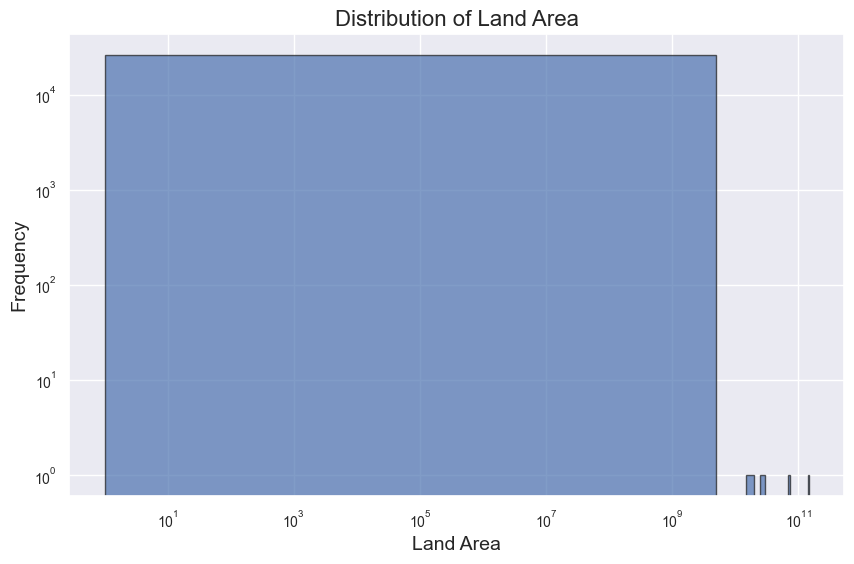

In [128]:
land_area = df['land_area']

plt.figure(figsize=(10, 6))
plt.hist(land_area, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Land Area')
plt.xlabel('Land Area')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Quantile Method to Handle Noise Data

In [129]:
threshold = land_area.quantile(0.99)
filtered_land_area = df[land_area < threshold]

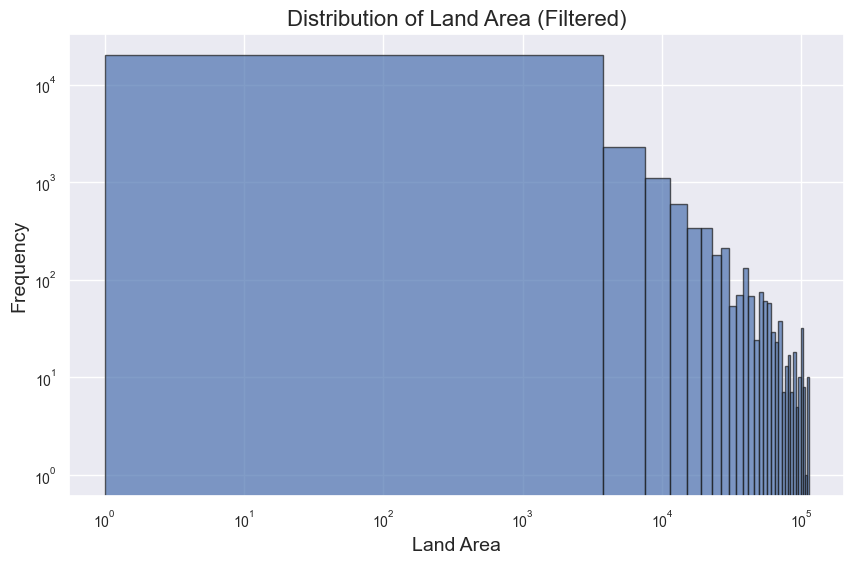

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_land_area['land_area'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Land Area (Filtered)')
plt.xlabel('Land Area')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Backup Dataframe

In [131]:
df = filtered_land_area.copy()

### Noise Data on Price Total

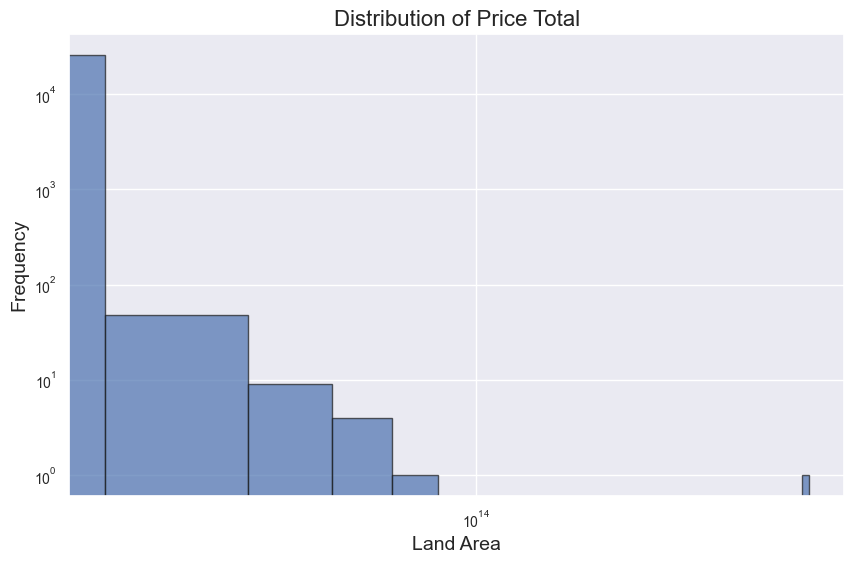

In [132]:
price_total = df['price_total']

plt.figure(figsize=(10, 6))
plt.hist(price_total, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Total')
plt.xlabel('Land Area')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Quantile Method to Handle Noise Data

In [133]:
threshold = price_total.quantile(0.99)
filtered_land_area = df[price_total < threshold]

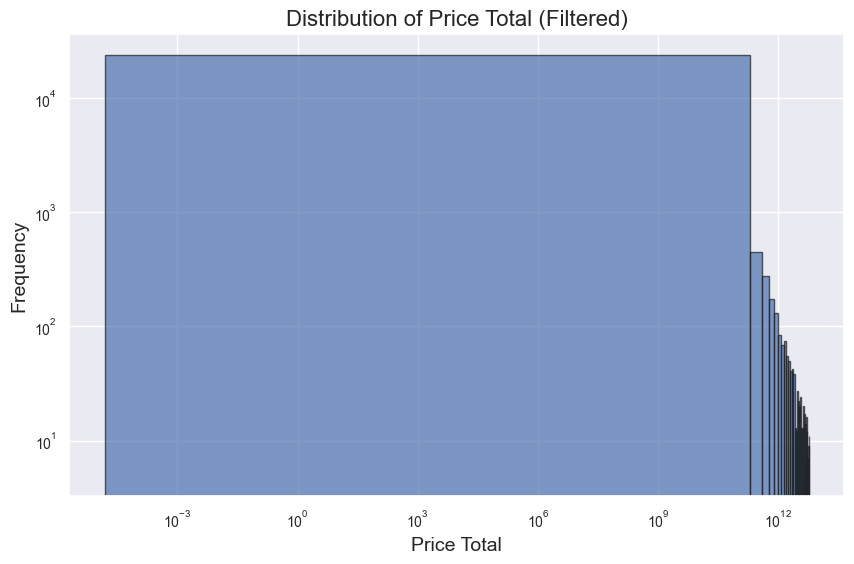

In [134]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_land_area['price_total'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Total (Filtered)')
plt.xlabel('Price Total')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Backup Dataframe

In [135]:
df = filtered_land_area.copy()

### Noise Data on Price Per m2

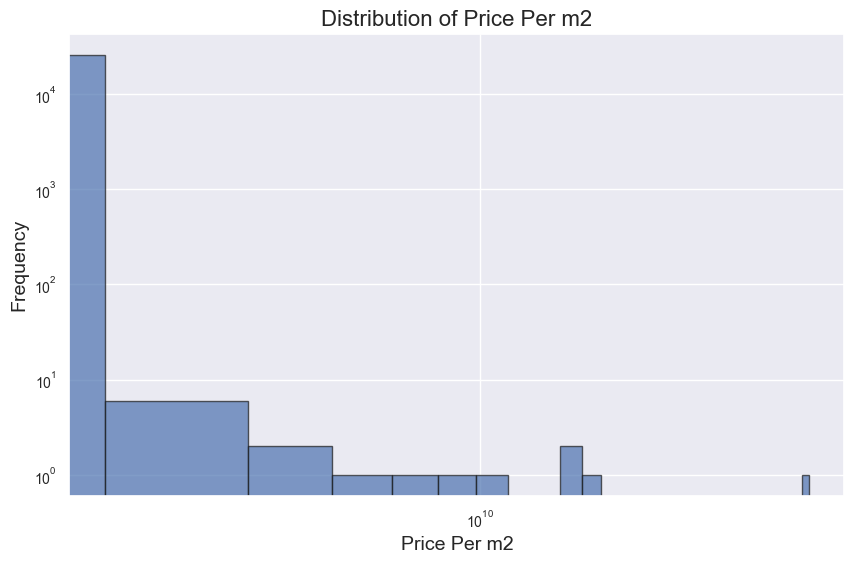

In [136]:
price_per_m2 = df['price_per_m2']

plt.figure(figsize=(10, 6))
plt.hist(price_per_m2, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Per m2')
plt.xlabel('Price Per m2')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Quantile Method to Handle Noise Data

In [137]:
threshold = price_per_m2.quantile(0.99)
filtered_land_area = df[price_per_m2 < threshold]

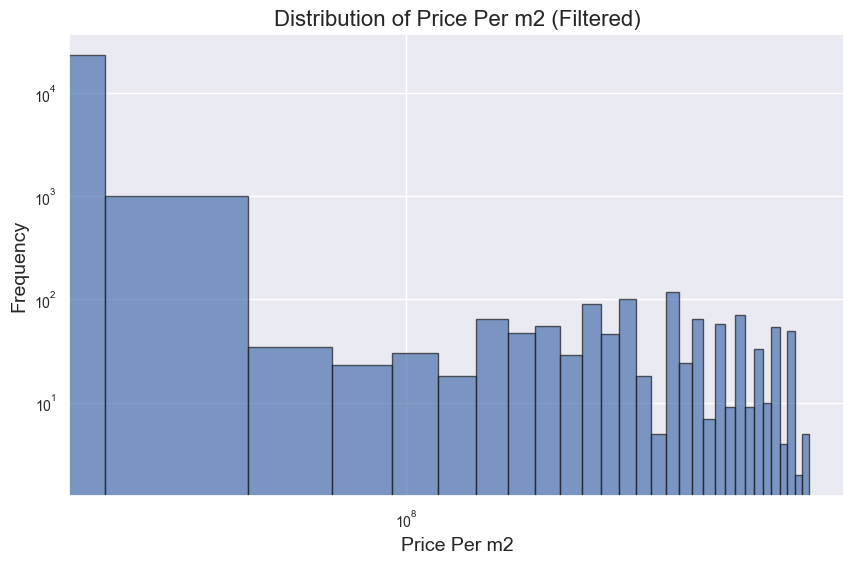

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_land_area['price_per_m2'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Per m2 (Filtered)')
plt.xlabel('Price Per m2')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

- Backup Dataframe

In [139]:
df = filtered_land_area.copy()

# Outlier Handling

- Backup Dataframe

In [140]:
df_outlier = df.copy()

In [141]:
df = df_outlier.copy()

### Outlier Handling on Land Area Column

- Data Before Outlier Handling

In [142]:
df['land_area'].describe()

count     25468.000000
mean       4290.826842
std       10297.426529
min           1.000000
25%         402.000000
50%        1000.000000
75%        3100.000000
max      113700.000000
Name: land_area, dtype: float64

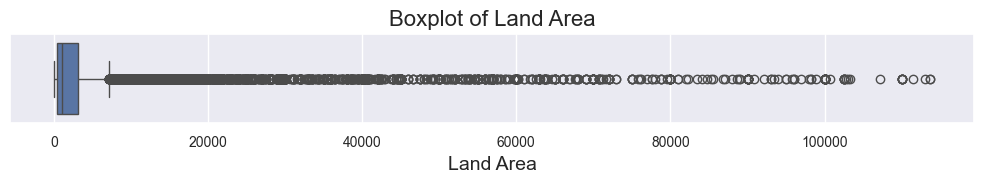

In [143]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

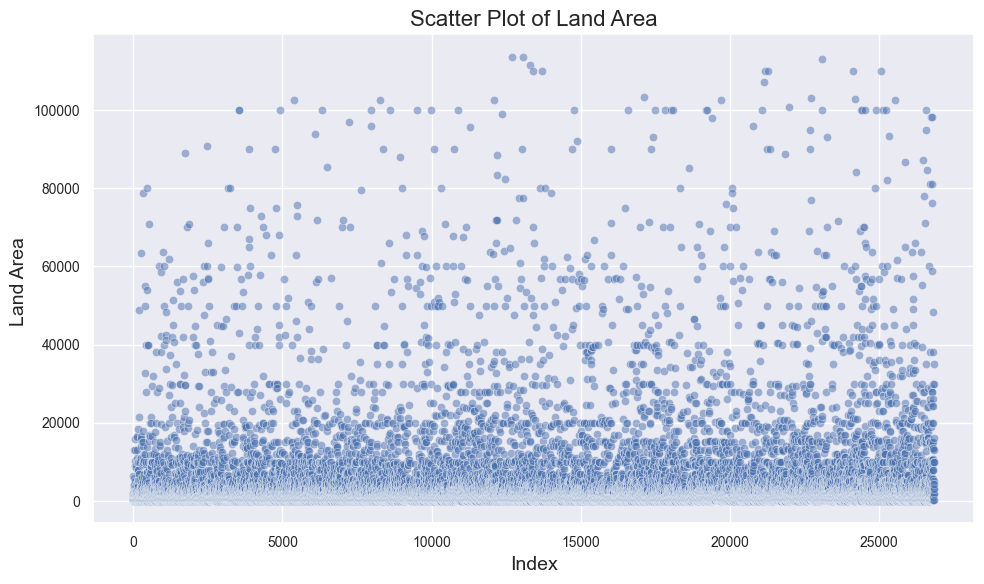

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area ')
plt.grid(True)
plt.tight_layout()
plt.show()

- Make Log Function for Land Area

In [145]:
df['log_land_area'] = np.log(df['land_area'])
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902


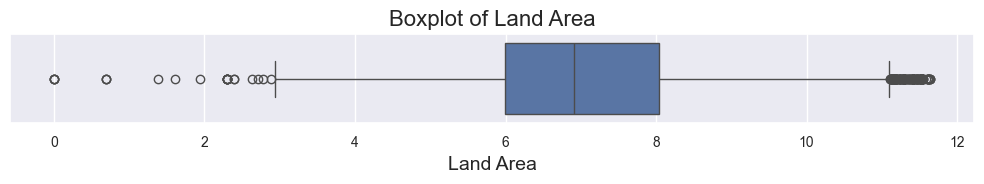

In [146]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

- Outlier Handling with IQR Method

In [147]:
Q1 = df['log_land_area'].quantile(0.25)
Q3 = df['log_land_area'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  2.932394135837697
upper_bound:  11.103215343254561


In [148]:
df = df[(df['log_land_area'] >= lower_bound) & (df['log_land_area'] <= upper_bound)]

- Data After Outlier Handling

In [149]:
df['log_land_area'].describe()

count    25286.000000
mean         7.105615
std          1.439333
min          2.944439
25%          5.993961
50%          6.907755
75%          8.027477
max         11.099196
Name: log_land_area, dtype: float64

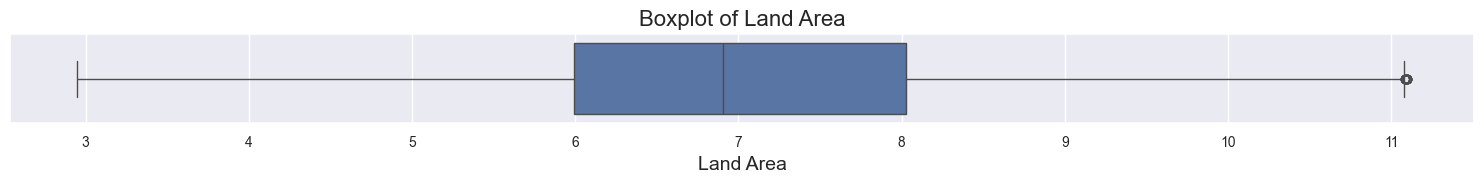

In [150]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['log_land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

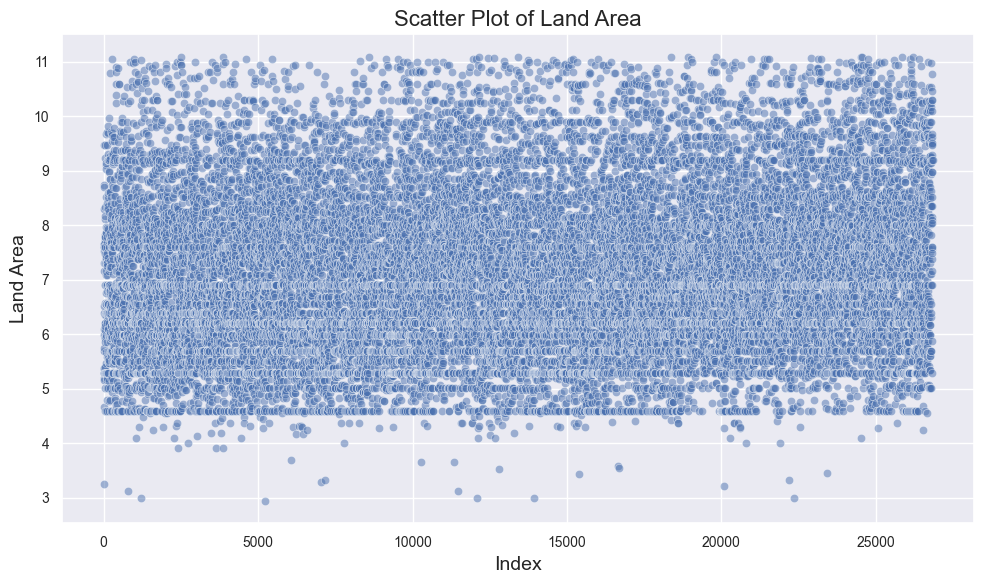

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area')
plt.grid(True)
plt.tight_layout()
plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 26837
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           25286 non-null  object 
 1   land_area      25286 non-null  float64
 2   price_total    25286 non-null  float64
 3   price_per_m2   25286 non-null  float64
 4   subdistrict    25286 non-null  object 
 5   regency        25286 non-null  object 
 6   log_land_area  25286 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


### Outlier Handling of Price Total Column

- Data Before Outlier Handling

In [153]:
df['price_total'].describe()

count    2.528600e+04
mean     8.602616e+10
std      4.200106e+11
min      0.000000e+00
25%      2.550000e+09
50%      7.000000e+09
75%      2.000000e+10
max      5.890000e+12
Name: price_total, dtype: float64

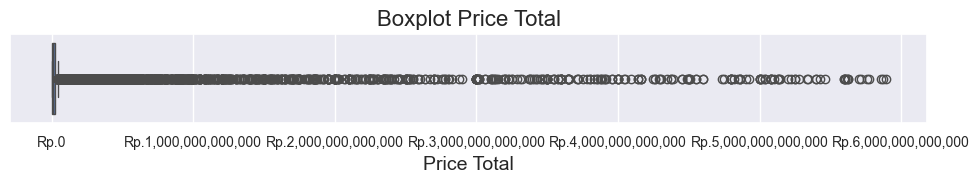

In [154]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_total'])
plt.title('Boxplot Price Total')
plt.xlabel('Price Total')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

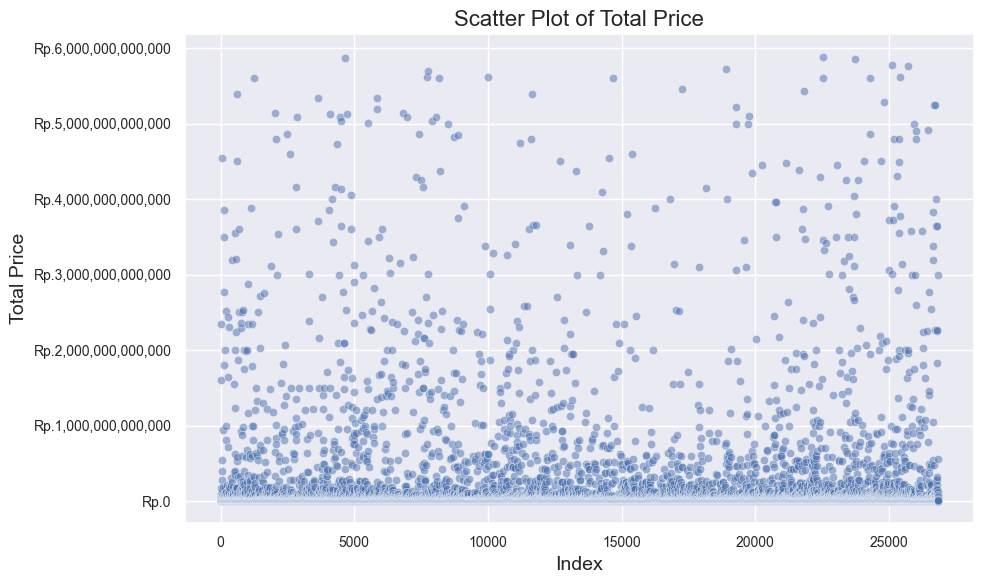

In [155]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

- Make Log Function for Price Total

In [156]:
df['log_price_total'] = np.log(df['price_total'])
df.head()

c:\Users\Wahpram\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129


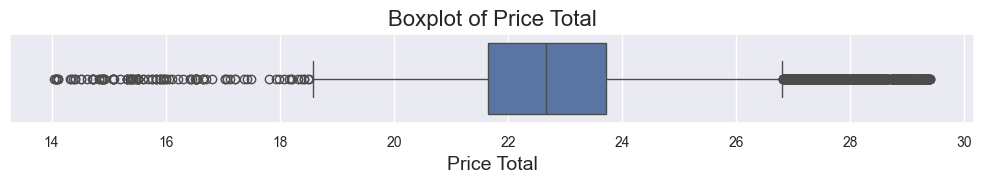

In [157]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_price_total'])
plt.title('Boxplot of Price Total')
plt.xlabel('Price Total')
plt.tight_layout()
plt.show()

- Outlier Handling with IQR Method

In [158]:
Q1 = df['log_price_total'].quantile(0.25)
Q3 = df['log_price_total'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  18.569900824541264
upper_bound:  26.808456482075883


In [159]:
df = df[(df['log_price_total'] >= lower_bound) & (df['log_price_total'] <= upper_bound)]

- Data After Outlier Handling

In [160]:
df['log_price_total'].describe()

count    24184.000000
mean        22.657006
std          1.467688
min         18.577684
25%         21.639557
50%         22.601203
75%         23.591165
max         26.798612
Name: log_price_total, dtype: float64

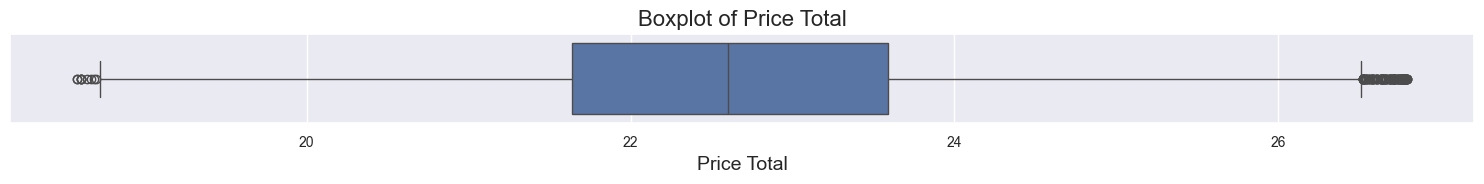

In [161]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['log_price_total'])
plt.title('Boxplot of Price Total')
plt.xlabel('Price Total')
plt.tight_layout()
plt.show()

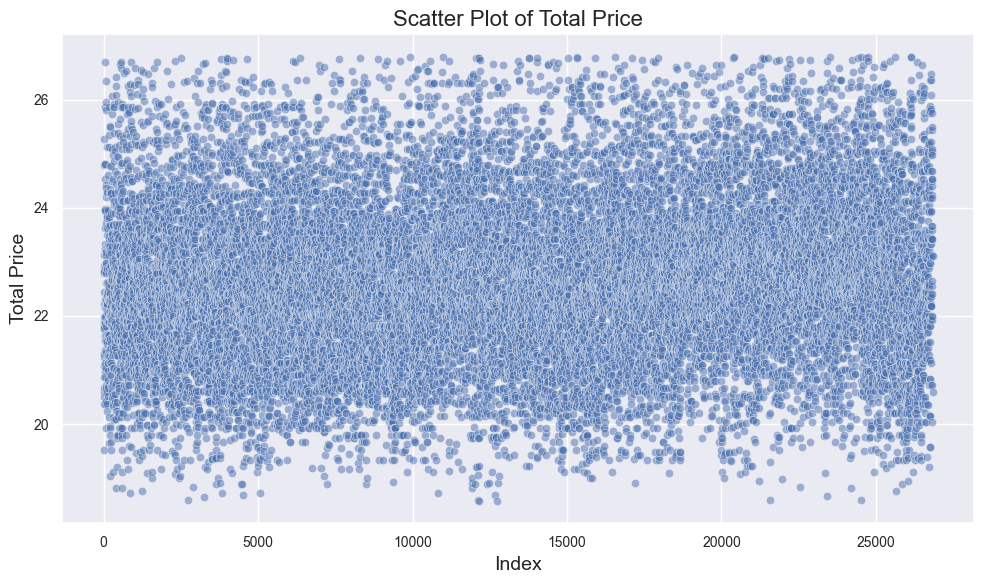

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24184 entries, 0 to 26835
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             24184 non-null  object 
 1   land_area        24184 non-null  float64
 2   price_total      24184 non-null  float64
 3   price_per_m2     24184 non-null  float64
 4   subdistrict      24184 non-null  object 
 5   regency          24184 non-null  object 
 6   log_land_area    24184 non-null  float64
 7   log_price_total  24184 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


### Outlier Handling of Price Per m2

- Data Before Outlier Handling

In [164]:
df['price_per_m2'].describe()

count    2.418400e+04
mean     1.166359e+07
std      3.745391e+07
min      5.988024e+03
25%      3.500000e+06
50%      6.500000e+06
75%      1.200000e+07
max      6.990000e+08
Name: price_per_m2, dtype: float64

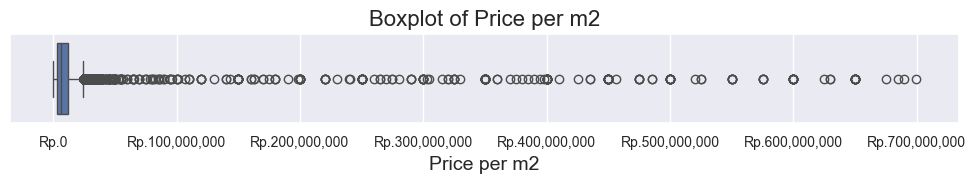

In [165]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

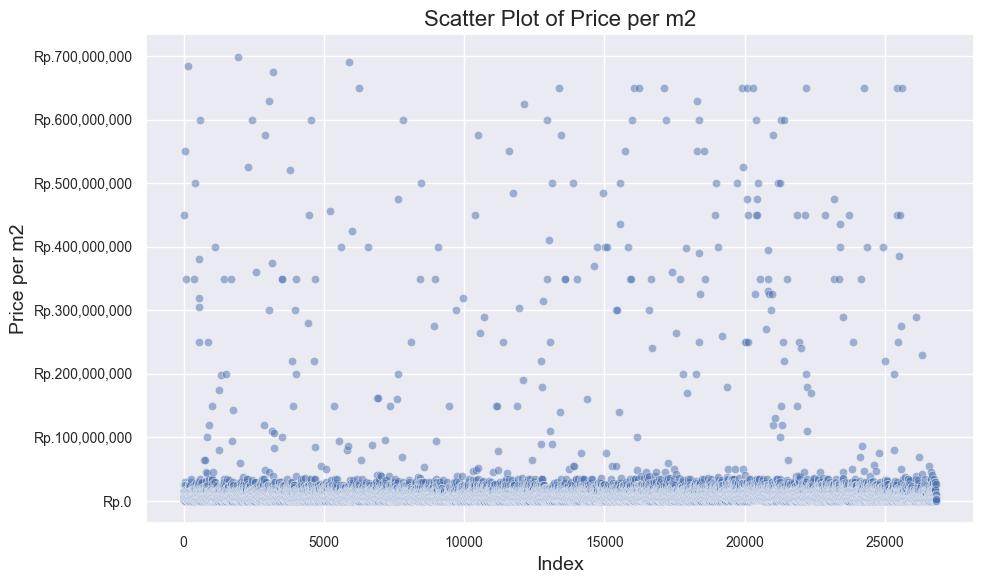

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

- Log Function for Price Per m2

In [167]:
df['log_price_per_m2'] = np.log(df['price_per_m2'])
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


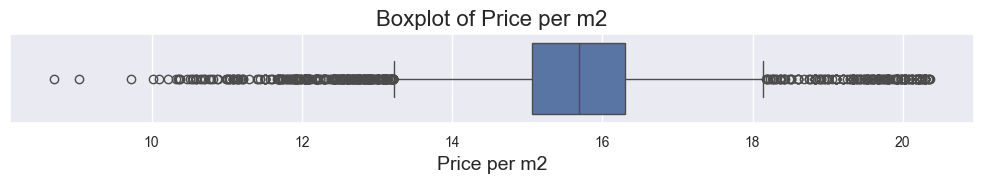

In [168]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.tight_layout()
plt.show()

- Outlier Handling with IQR Method

In [169]:
Q1 = df['log_price_per_m2'].quantile(0.25)
Q3 = df['log_price_per_m2'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  13.220058004520691
upper_bound:  18.148632729691226


In [170]:
df = df[(df['log_price_per_m2'] >= lower_bound) & (df['log_price_per_m2'] <= upper_bound)]

In [171]:
df['log_price_per_m2'].describe()

count    23418.000000
mean        15.658730
std          0.825940
min         13.220803
25%         15.134794
50%         15.687313
75%         16.300417
max         18.132999
Name: log_price_per_m2, dtype: float64

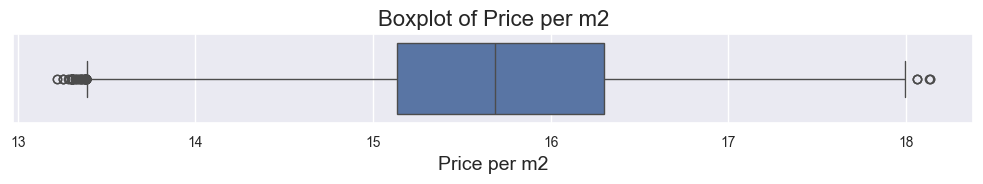

In [172]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.tight_layout()
plt.show()

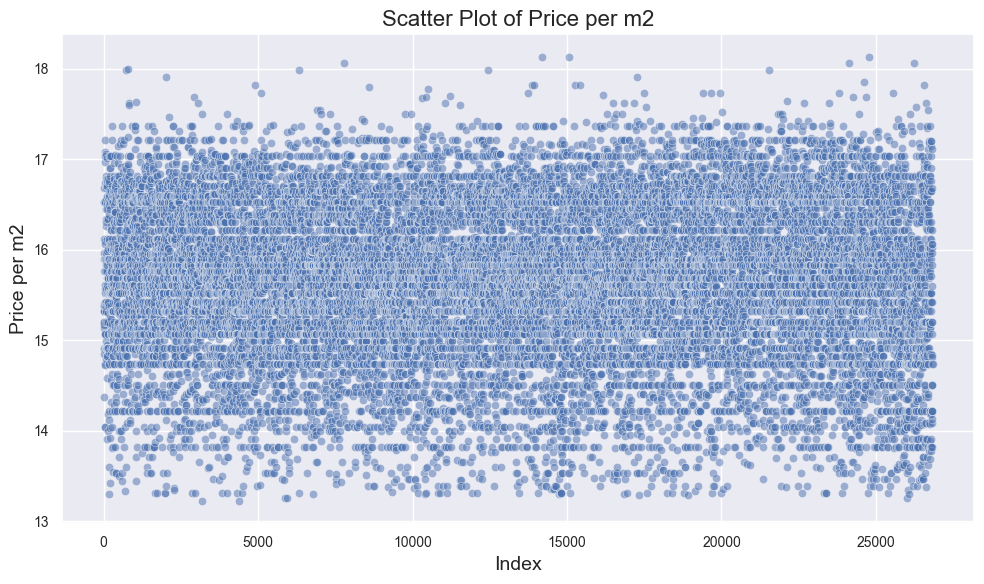

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23418 entries, 0 to 26835
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              23418 non-null  object 
 1   land_area         23418 non-null  float64
 2   price_total       23418 non-null  float64
 3   price_per_m2      23418 non-null  float64
 4   subdistrict       23418 non-null  object 
 5   regency           23418 non-null  object 
 6   log_land_area     23418 non-null  float64
 7   log_price_total   23418 non-null  float64
 8   log_price_per_m2  23418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.8+ MB


In [175]:
df['log_price_per_m2'].describe()

count    23418.000000
mean        15.658730
std          0.825940
min         13.220803
25%         15.134794
50%         15.687313
75%         16.300417
max         18.132999
Name: log_price_per_m2, dtype: float64

In [176]:
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


In [177]:
filtered_df = df[(df['log_land_area'] > 0) & (df['log_price_total'] > 0) & (df['price_per_m2'] > 0)]
df = filtered_df

df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


# Data Transformation

### Convert Date Column to Datetime Datatype

In [178]:
df['date'] = pd.to_datetime(df['date'])

df_date_conv = df.copy()
df_date_conv.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


In [179]:
df_date_conv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23418 entries, 0 to 26835
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              23418 non-null  datetime64[ns]
 1   land_area         23418 non-null  float64       
 2   price_total       23418 non-null  float64       
 3   price_per_m2      23418 non-null  float64       
 4   subdistrict       23418 non-null  object        
 5   regency           23418 non-null  object        
 6   log_land_area     23418 non-null  float64       
 7   log_price_total   23418 non-null  float64       
 8   log_price_per_m2  23418 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ MB


- Backup Dataframe

In [180]:
df = df_date_conv.copy()
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


# Feature Engineering

### Check Dataframe

In [181]:
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Kuta Selatan,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Kuta Utara,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Kuta Utara,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kerambitan,Tabanan,7.600902,22.790129,15.189226


### Check Land Area Column

In [182]:
df['land_area'].describe()

count    23418.000000
mean      3150.144675
std       6705.020045
min         20.000000
25%        400.000000
50%        980.000000
75%       2770.000000
max      66118.000000
Name: land_area, dtype: float64

### Make New Feature Based on Land Area

In [183]:
bins = [0, 400, 2770, float('inf')]
labels = ['small', 'medium', 'large']
df['land_area_cat'] = pd.cut(df['land_area'], bins=bins, labels=labels)

df.sort_values(by='land_area', ascending=True)

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2,land_area_cat
13926,2024-01-20,20.0,1.100000e+09,5.500000e+07,Selemadeg,Tabanan,2.995732,20.818576,17.822844,small
778,2024-05-17,23.0,1.500000e+09,6.521739e+07,Denpasar Selatan,Denpasar,3.135494,21.128731,17.993237,small
20085,2024-03-20,25.0,7.500000e+08,3.000000e+07,Denpasar Timur,Denpasar,3.218876,20.435584,17.216708,small
23407,2024-04-19,32.0,1.280000e+08,4.000000e+06,Kubu Tambahan,Buleleng,3.465736,18.667541,15.201805,small
12811,2024-01-20,34.0,1.870000e+08,5.500000e+06,Blahbatuh,Gianyar,3.526361,19.046619,15.520259,small
...,...,...,...,...,...,...,...,...,...,...
22900,2024-02-19,64000.0,3.200000e+11,5.000000e+06,Gianyar,Gianyar,11.066638,26.491587,15.424948,large
18360,2023-11-21,65000.0,1.780000e+11,2.738462e+06,Ubud,Gianyar,11.082143,25.905049,14.822907,large
24548,2024-03-20,65000.0,4.550000e+10,7.000000e+05,Petang,Badung,11.082143,24.540978,13.458836,large
26202,2024-03-20,66118.0,1.980000e+11,2.994646e+06,Ubud,Gianyar,11.099196,26.011533,14.912337,large


# Export Dataframe to MongoDB

- Import Module

In [184]:
from scripts import load_data_to_mongo

- Export Data to MongoDB

In [185]:
data = df.to_dict(orient='index')

In [186]:
load_data_to_mongo.load_to_mongo(data, 'clean')

----------------------------------------------
Connected to db
Total documents inserted: 23418
Total documents in collection: 23418
Dissconnected!
